<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/nhandien_chi_tay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nhận diện 5 chỉ tay**

1.   Giàu
2.   Giỏi
3.   Hạnh phúc
4.   Nghèo
5.   Thành công

In [1]:
#Khai báo thư viện

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU
#-----------------------------------------------------------------------------#
from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split
#-----------------------------------------------------------------------------#
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Đường dẫn file train
data = '/content/drive/MyDrive/gk/chitay/train'

In [3]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(data, target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 90 images belonging to 5 classes.


{'giau': 0, 'gioi': 1, 'hanhphuc': 2, 'ngheo': 3, 'thanhcong': 4}

In [4]:
#Tạo mô hình Sequential
model=Sequential()

#Tích chập 1
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))

#Tích chập 2
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

#Tích chập 3
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())    #Làm phẳng thành vecto

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [5]:
#Bắt đầu huấn luyện
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=30, batch_size=256, verbose=1)  #verbose=1 -> hiển thị quá trình học ra

Epoch 1/30
3/3 [==============================] - 43s 14s/step - loss: 18.6869 - accuracy: 0.1778
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 6.8938 - accuracy: 0.2667
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 1.3806 - accuracy: 0.4111
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 1.0377 - accuracy: 0.6778
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 0.5326 - accuracy: 0.9111
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 0.3447 - accuracy: 0.9000
Epoch 7/30
3/3 [==============================] - 6s 2s/step - loss: 0.2227 - accuracy: 0.9222
Epoch 8/30
3/3 [==============================] - 4s 2s/step - loss: 0.1690 - accuracy: 0.9444
Epoch 9/30
3/3 [==============================] - 5s 2s/step - loss: 0.1558 - accuracy: 0.9444
Epoch 10/30
3/3 [==============================] - 5s 1s/step - loss: 0.1737 - accuracy: 0.9667
Epoch 11/30
3/3 [=============================

In [6]:
#Show độ chính xác và độ mất mát 
Score=model.evaluate(Train,verbose=0)
print('Độ Mất Mát: ', Score[0])
print('Độ Chính Xác: ', Score[1])

Độ Mất Mát:  0.005863399710506201
Độ Chính Xác:  1.0


In [7]:
#Lưu file
model.save('/content/drive/MyDrive/gk/save_train/chitay.h5')

In [8]:
#Load file
model_1 = load_model('/content/drive/MyDrive/gk/save_train/chitay.h5')

1/1 [==============================] - 0s 220ms/step
Đây là: Hạnh phúc


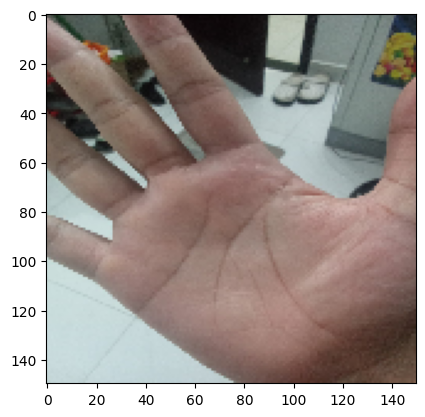

1/1 [==============================] - 0s 20ms/step
Đây là: Nghèo


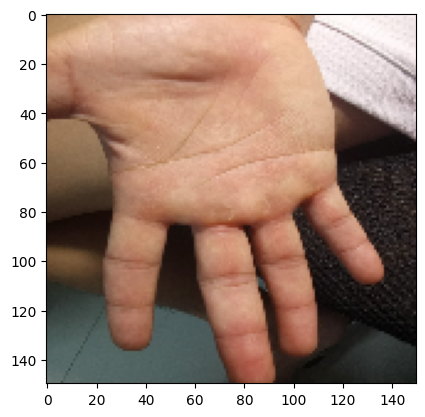

1/1 [==============================] - 0s 20ms/step
Đây là: Giàu


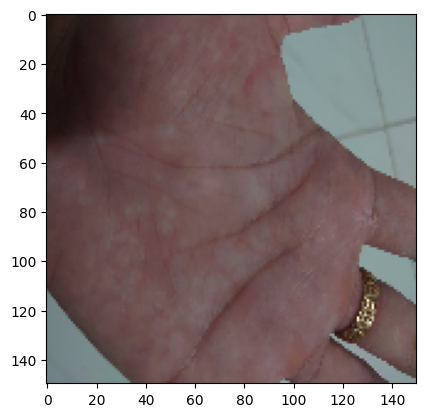

1/1 [==============================] - 0s 19ms/step
Đây là: Giỏi


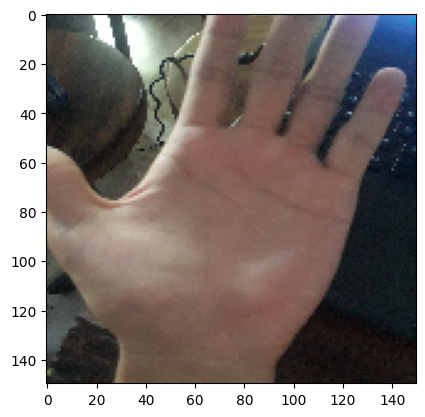

1/1 [==============================] - 0s 34ms/step
Đây là: Thành công


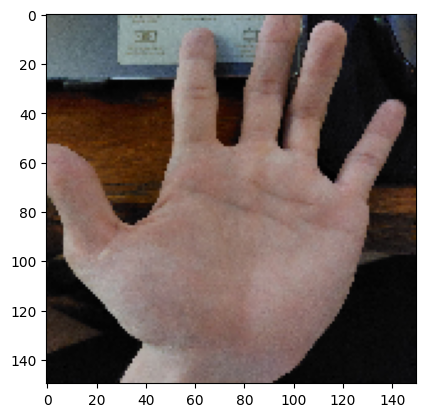

In [9]:
#Test(nhận dạng 5 chỉ tay)
folder='/content/drive/MyDrive/gk/chitay/test/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Giàu', 'Giỏi', 'Hạnh phúc', 'Nghèo', 'Thành công']
  print('Đây là: {}'.format(class_name[result]))
  plt.show()